In [1]:
from entropylab import *
from entropylab.api.plot import CirclePlotGenerator, LinePlotGenerator, ImShowPlotGenerator
from entropylab.api.data_writer import PlotSpec

from mock_instruments import MockScope
import numpy as np

from plots_library import LinfitPlotGenerator, MyImShowPlotGenerator

db = SqlAlchemyDB(path='.')
labResources = ExperimentResources(db)


In [2]:
# %% one node
def node_operation():
    return {'res': [1, 2, 3, 6]}


node1 = PyNode(label="first_node", program=node_operation, output_vars={'res'})

experiment = Graph(resources=labResources, graph={node1}, story="run_a",label="my first experiment")

handle = experiment.run()

2022-02-24 16:18:34,030 - entropy - INFO - Running node <PyNode> first_node
2022-02-24 16:18:34,276 - entropy - INFO - Finished entropy experiment execution successfully


In [3]:
# %% one node with a number
def node_operation():
    return {'res': [0]}


node1 = PyNode(label="first_node", program=node_operation, output_vars={'res'})

experiment = Graph(resources=labResources, graph={node1}, label = "single int",story="run_a")

handle = experiment.run()



2022-02-24 16:18:54,530 - entropy - INFO - Running node <PyNode> first_node
2022-02-24 16:18:54,552 - entropy - INFO - Finished entropy experiment execution successfully


In [4]:
# %% one node with 2d autoplot
def node_operation():
    return {'res': np.random.rand(10,10)}


node1 = PyNode(label="first_node", program=node_operation, output_vars={'res'})

experiment = Graph(resources=labResources, graph={node1}, label = "auto 2d-plot", story="run_a")

handle = experiment.run()


2022-02-24 16:19:13,764 - entropy - INFO - Running node <PyNode> first_node
2022-02-24 16:19:13,786 - entropy - INFO - Finished entropy experiment execution successfully


In [5]:
# %% one node with manual plot
def node_operation(context: EntropyContext):
    micro = 1e-6
    data = [
        [
            1 * micro,
            2 * micro,
            3 * micro,
            4 * micro,
            5 * micro,
            6 * micro,
            7 * micro,
            8 * micro,
        ],
        [0, 1, 2, 3, 4, 5, 6, 7],
    ]
    context.add_plot(
        PlotSpec(
            label="plot",
            story="created this plot in experiment",
            generator=CirclePlotGenerator,
        ),

        data=data,
    )

    context.add_plot(
        PlotSpec(
            label="plot2",
            story="created this plot in experiment",
            generator=LinePlotGenerator,
        ),

        data=data,
    )

    return {'res': data}


node1 = PyNode(label="first_node", program=node_operation, output_vars={'res'})

experiment = Graph(resources=labResources, graph={node1}, story="run_a",label="manual add plots")

handle = experiment.run()


2022-02-24 16:19:54,248 - entropy - INFO - Running node <PyNode> first_node
2022-02-24 16:19:54,274 - entropy - INFO - Finished entropy experiment execution successfully


In [6]:
# %% one node with overlay
def node_operation(context: EntropyContext):
    micro = 1e-6
    data = [
        np.linspace(0, 10, 100),
        np.linspace(0, 10, 100) + np.random.random(100) * 5,

    ]

    context.add_plot(
        PlotSpec(
            label="plot",
            story="created this plot in experiment",
            generator=LinfitPlotGenerator,

        ),

        data=(data, {'xlabel': 'my_x2', 'ylabel': 'my_y'})
    )

    context.add_plot(
        PlotSpec(
            label="plot2",
            story="created this plot in experiment",
            generator=LinePlotGenerator,
        ),

        data=data,
    )

    return {'res': data}


node1 = PyNode(label="first_node", program=node_operation, output_vars={'res'})

experiment = Graph(resources=labResources, graph={node1}, story="run_a", label="linear fit")

handle = experiment.run()



2022-02-24 16:20:43,753 - entropy - INFO - Running node <PyNode> first_node
2022-02-24 16:20:43,786 - entropy - INFO - Finished entropy experiment execution successfully


2022-02-24 16:21:35,082 - entropy - INFO - Running node <PyNode> first node
2022-02-24 16:21:35,094 - entropy - INFO - Running node <PyNode> second node
2022-02-24 16:21:35,114 - entropy - INFO - Finished entropy experiment execution successfully


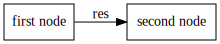

In [7]:

# %% two connected nodes

def node_with_input(x):
    return {'res': x + 1}


node1 = PyNode(label="first node", program=lambda: {'res': np.cos(np.linspace(0, 3))}, output_vars={'res'})
node2 = PyNode(label="second node", program=node_with_input, input_vars={'x': node1.outputs["res"]},
               output_vars={'res'})

experiment = Graph(resources=labResources, graph={node1, node2}, story="run_a",label="multi node")
handle = experiment.run()

experiment.dot_graph()

In [8]:
# %% nodes with instruments

labResources.add_temp_resource(
    "scope_1", MockScope("1.1.1.1", "")
)


# %%
def work_with_scope(context: EntropyContext):
    scope = context.get_resource('scope_1')
    scope.connect()
    scope.get_trig()
    return {'res': [0, 1, 2, 3, 4]}


node1 = PyNode(label="first_node", program=work_with_scope, output_vars={'res'})
experiment = Graph(resources=labResources, graph={node1}, story="a scope", label='experiment with instruments')
handle = experiment.run()


2022-02-24 16:24:19,697 - entropy - INFO - Running node <PyNode> first_node
Connected!
got trig 1
2022-02-24 16:24:19,864 - entropy - INFO - Finished entropy experiment execution successfully
